In [142]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipeadatapy as ipea
plt.rcParams["figure.figsize"] = (12, 6)

In [57]:
ipea.list_series("IBC")

,CODE,NAME
101,SGS12_IBCBR12,IBC-Br - índice real (2022=100)
102,SGS12_IBCBRDESSAZ12,IBC-Br - índice real dessazonalizado (2022=100)


In [58]:
ipea.list_series(code="SGS12_IBCBRDESSAZ12")

,CODE,NAME
102,SGS12_IBCBRDESSAZ12,IBC-Br - índice real dessazonalizado (2022=100)


In [61]:
x = ipea.timeseries("SGS12_IBCBRDESSAZ12")
x

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (-)
DATE,,,,,,
2003-01-01,SGS12_IBCBRDESSAZ12,2003-01-01T00:00:00-02:00,1,1,2003,70.45938
2003-02-01,SGS12_IBCBRDESSAZ12,2003-02-01T00:00:00-02:00,1,2,2003,71.63252
2003-03-01,SGS12_IBCBRDESSAZ12,2003-03-01T00:00:00-03:00,1,3,2003,71.28763
2003-04-01,SGS12_IBCBRDESSAZ12,2003-04-01T00:00:00-03:00,1,4,2003,71.14243
2003-05-01,SGS12_IBCBRDESSAZ12,2003-05-01T00:00:00-03:00,1,5,2003,70.06648
...,...,...,...,...,...,...
2025-02-01,SGS12_IBCBRDESSAZ12,2025-02-01T00:00:00-03:00,1,2,2025,109.05409
2025-03-01,SGS12_IBCBRDESSAZ12,2025-03-01T00:00:00-03:00,1,3,2025,109.78511
2025-04-01,SGS12_IBCBRDESSAZ12,2025-04-01T00:00:00-03:00,1,4,2025,109.91207


In [117]:
dados = pd.DataFrame()
dados = np.log(x['VALUE (-)']).diff()

In [118]:
dados = dados.dropna()
dados

DATE
2003-02-01    0.016513
2003-03-01   -0.004826
2003-04-01   -0.002039
2003-05-01   -0.015239
2003-06-01    0.002258
                ...   
2025-02-01    0.006498
2025-03-01    0.006681
2025-04-01    0.001156
2025-05-01   -0.007232
2025-06-01   -0.000558
Name: VALUE (-), Length: 269, dtype: float64

<Axes: xlabel='DATE'>

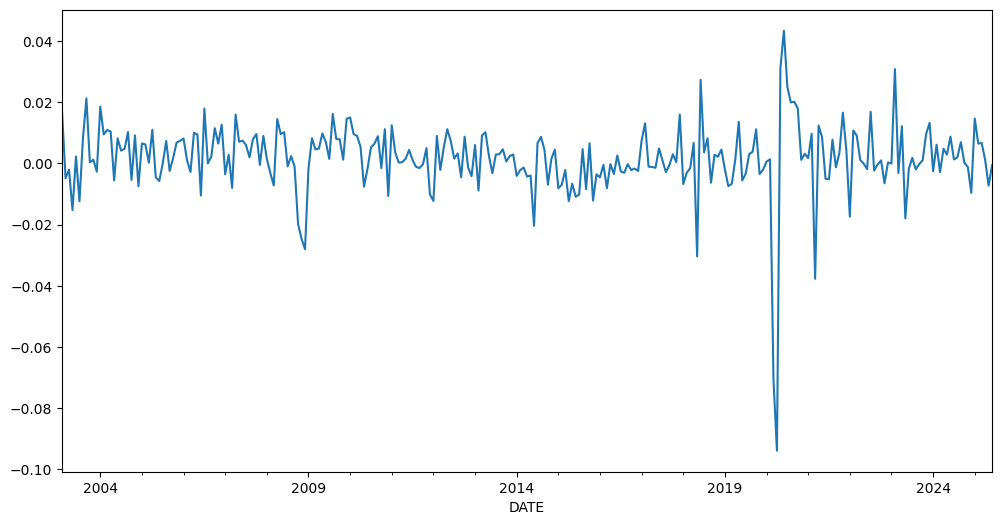

In [143]:
dados.plot()

In [81]:
import statsmodels.api as sm

In [107]:
mod_hamilton = sm.tsa.MarkovAutoregression(
    dados, k_regimes=2, order=4, switching_ar=True, switching_variance=True
)
res_hamilton = mod_hamilton.fit()

C:\ProgramData\Anaconda3\envs\bbvi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [108]:
res_hamilton.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                VALUE (-)   No. Observations:                  265
Model:             MarkovAutoregression   Log Likelihood                 886.981
Date:                  Tue, 09 Sep 2025   AIC                          -1745.961
Time:                          09:22:02   BIC                          -1695.845
Sample:                      02-01-2003   HQIC                         -1725.825
                           - 06-01-2025                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.001      4.511      0.000       0.001       0.003
sigma2      4.638e-05   5.06e-06      9.162      0.000    3.65e-05    5.63e-05
ar.L1         -0.0227      0.066     -0.346      0.729      -0.151       0.106
ar.L2          0.0225      0.064      0.353      0.724      -0.102       0.147
ar.L3         -0.0059      0.064     -0.093      0.926      -0.131       0.119
ar.L4          0.0869      0.058      1.510      0.131      -0.026       0.200
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.004     -0.258      0.796      -0.009       0.007
sigma2         0.0007      0.000      2.376      0.018       0.000       0.001
ar.L1          0.8956      0.270      3.318      0.001       0.367       1.425
ar.L2          0.0481      0.251      0.192      0.848      -0.443       0.540
ar.L3          0.0114      0.173      0.066      0.948      -0.328       0.351
ar.L4          0.0252      0.082      0.306      0.760      -0.136       0.187
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9638      0.018     52.176      0.000       0.928       1.000
p[1->0]        0.3846      0.149      2.584      0.010       0.093       0.676
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [109]:
print(res_hamilton.expected_durations)

[27.64253809  2.59985577]


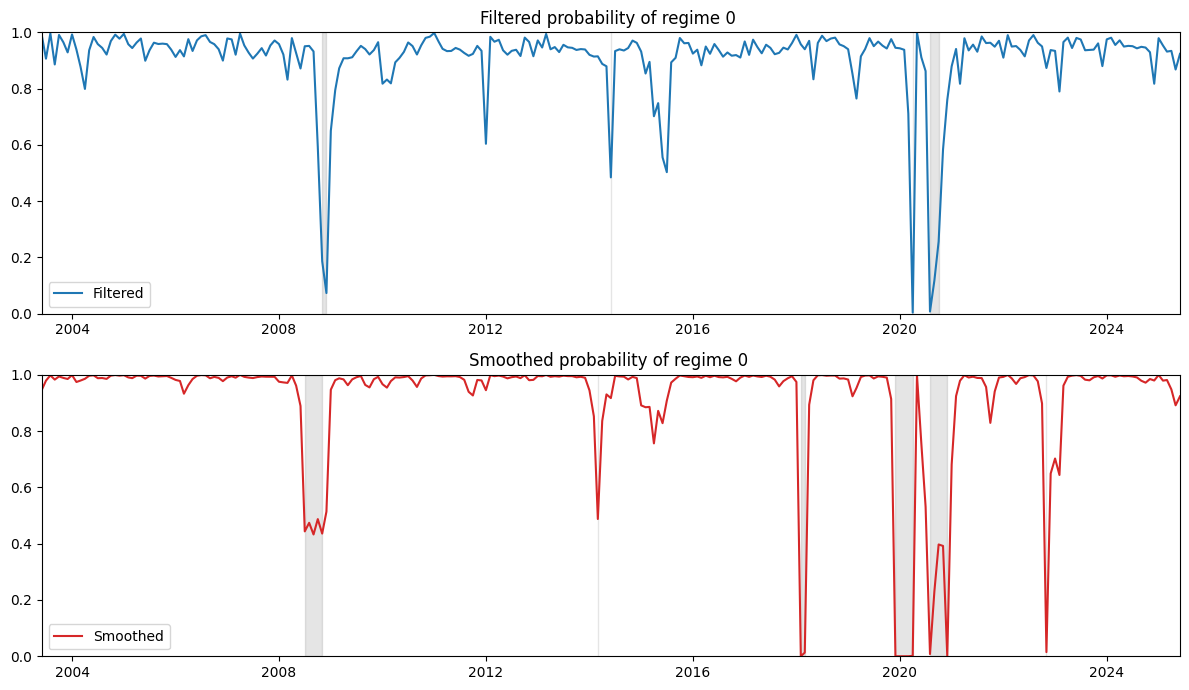

In [205]:
# Pegue as séries já indexadas corretamente
p_filt   = res_hamilton.filtered_marginal_probabilities[0]
p_smooth = res_hamilton.smoothed_marginal_probabilities[0]

idx_f = p_filt.index
idx_s = p_smooth.index

fig, axes = plt.subplots(2, figsize=(12, 7), sharex=False)

# ------------------- 1) Probabilidade filtrada -------------------
ax = axes[0]
ax.plot(idx_f, p_filt, label="Filtered")
ax.fill_between(idx_f, 0, 1, where=(p_filt < 0.5).values, color="k", alpha=0.1)
ax.set_xlim(idx_f[0], idx_f[-1])
ax.set_ylim(0, 1)
ax.set_title("Filtered probability of regime 0 ")
ax.legend()

# ------------------- 2) Probabilidade suavizada -------------------
ax = axes[1]
ax.plot(idx_s, p_smooth, label="Smoothed", color="tab:red")
ax.fill_between(idx_s, 0, 1, where=(p_smooth < 0.5).values, color="k", alpha=0.1)
ax.set_xlim(idx_s[0], idx_s[-1])
ax.set_ylim(0, 1)
ax.set_title("Smoothed probability of regime 0 ")
ax.legend()

fig.tight_layout()
plt.show()


# Exemplo finanças
Kim, Nelson, and Startz (1998) Three-state Variance Switching

In [139]:
import yfinance as yf

In [140]:
ticker = "PETR4.SA"
petr4 = yf.download(ticker, start="2020-01-01", end=None, interval="1d")
print(petr4.tail())

C:\Users\guilh\AppData\Local\Temp\ipykernel_6232\4289671292.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  petr4 = yf.download(ticker, start="2020-01-01", end=None, interval="1d")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker       PETR4.SA   PETR4.SA   PETR4.SA   PETR4.SA  PETR4.SA
Date                                                            
2025-09-02  31.330000  31.440001  31.000000  31.000000  19812000
2025-09-03  31.059999  31.350000  30.920000  31.120001  29788800
2025-09-04  31.059999  31.320000  30.930000  31.000000  24816500
2025-09-05  30.590000  31.090000  30.190001  31.080000  46121900
2025-09-08  30.709999  30.969999  30.510000  30.830000  18164200


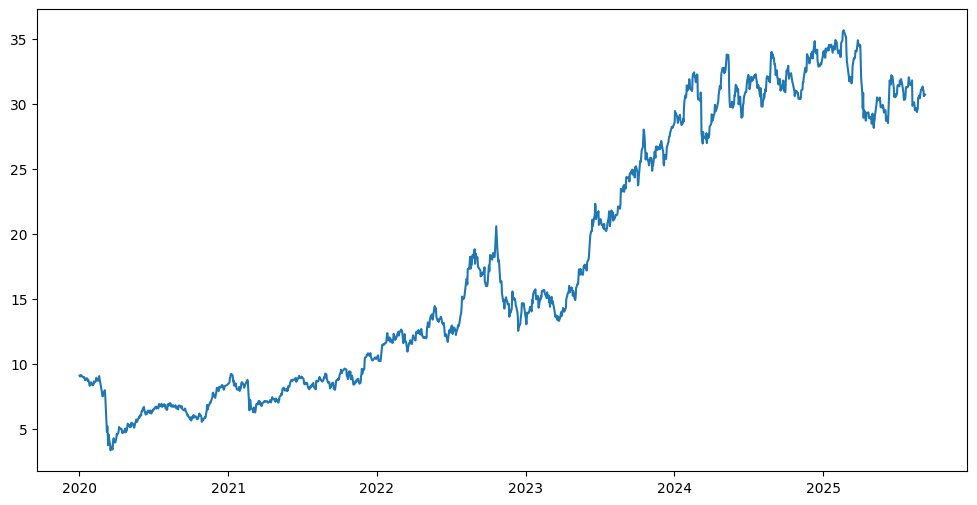

In [144]:
plt.plot(petr4['Close'])

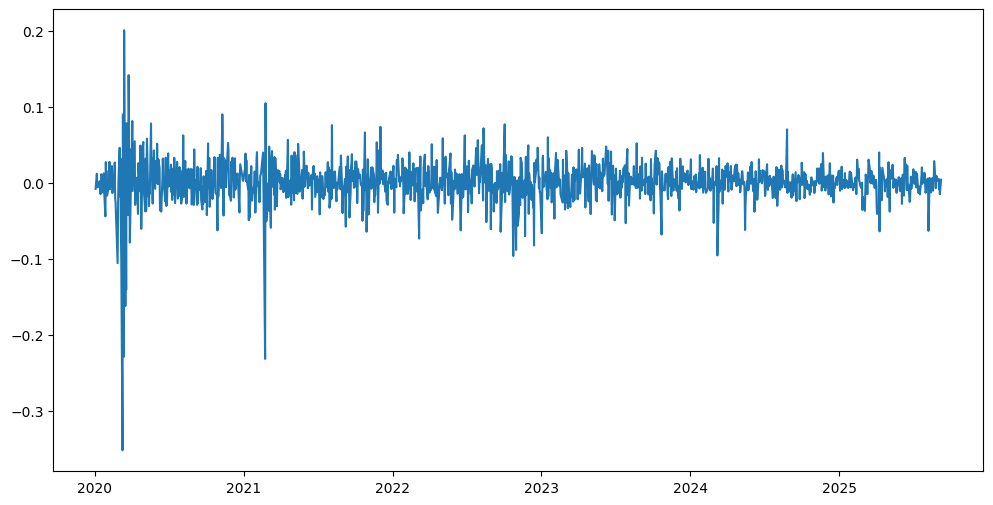

In [147]:
log_diff = np.log(petr4['Close']).diff()
log_diff = log_diff.dropna()
plt.plot(log_diff)

In [148]:
mod_kns = sm.tsa.MarkovRegression(
    log_diff, k_regimes=3, trend="n", switching_variance=True
)
res_kns = mod_kns.fit()

C:\ProgramData\Anaconda3\envs\bbvi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [149]:
res_kns.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:               PETR4.SA   No. Observations:                 1415
Model:               MarkovRegression   Log Likelihood                3432.584
Date:                Tue, 09 Sep 2025   AIC                          -6847.169
Time:                        09:33:58   BIC                          -6799.875
Sample:                             0   HQIC                         -6829.499
                               - 1415                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0001   1.51e-05      9.070      0.000       0.000       0.000
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0007   5.66e-05     12.796      0.000       0.001       0.001
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0150      0.005      3.138      0.002       0.006       0.024
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9069   7.22e-05   1.26e+04      0.000       0.907       0.907
p[1->0]        0.0731      0.018      4.087      0.000       0.038       0.108
p[2->0]     6.185e-14        nan        nan        nan         nan         nan
p[0->1]        0.0931    2.4e-05   3887.372      0.000       0.093       0.093
p[1->1]        0.9237      0.018     51.020      0.000       0.888       0.959
p[2->1]        0.0897      0.063      1.418      0.156      -0.034       0.214
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

C:\Users\guilh\AppData\Local\Temp\ipykernel_6232\2997162724.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = float(P[i, j])   # <-- conversão para float


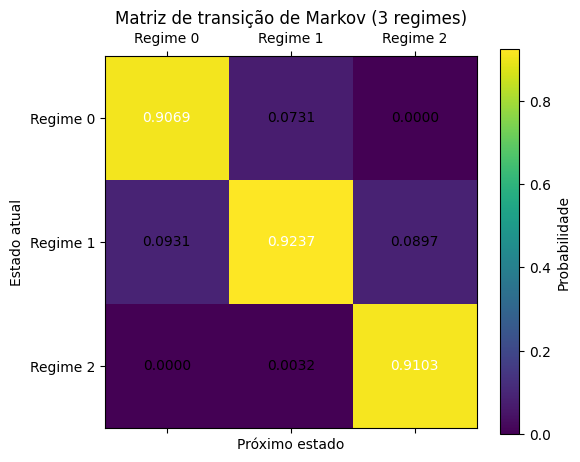

In [161]:
P = res_kns.regime_transition

# Se for pandas DataFrame, converte para numpy
if hasattr(P, "values"):
    P = P.values

fig, ax = plt.subplots(figsize=(6, 5))
cax = ax.matshow(P, cmap="viridis")

# Adiciona valores em cada célula
for i in range(P.shape[0]):
    for j in range(P.shape[1]):
        val = float(P[i, j])   # <-- conversão para float
        ax.text(j, i, f"{val:.4f}",
                ha="center", va="center",
                color="white" if val > 0.5 else "black")

# Ajustes de ticks
ax.set_xticks(range(P.shape[1]))
ax.set_yticks(range(P.shape[0]))
ax.set_xticklabels([f"Regime {j}" for j in range(P.shape[1])])
ax.set_yticklabels([f"Regime {i}" for i in range(P.shape[0])])
ax.set_xlabel("Próximo estado")
ax.set_ylabel("Estado atual")
ax.set_title("Matriz de transição de Markov (3 regimes)")

fig.colorbar(cax, ax=ax, label="Probabilidade")
plt.show()

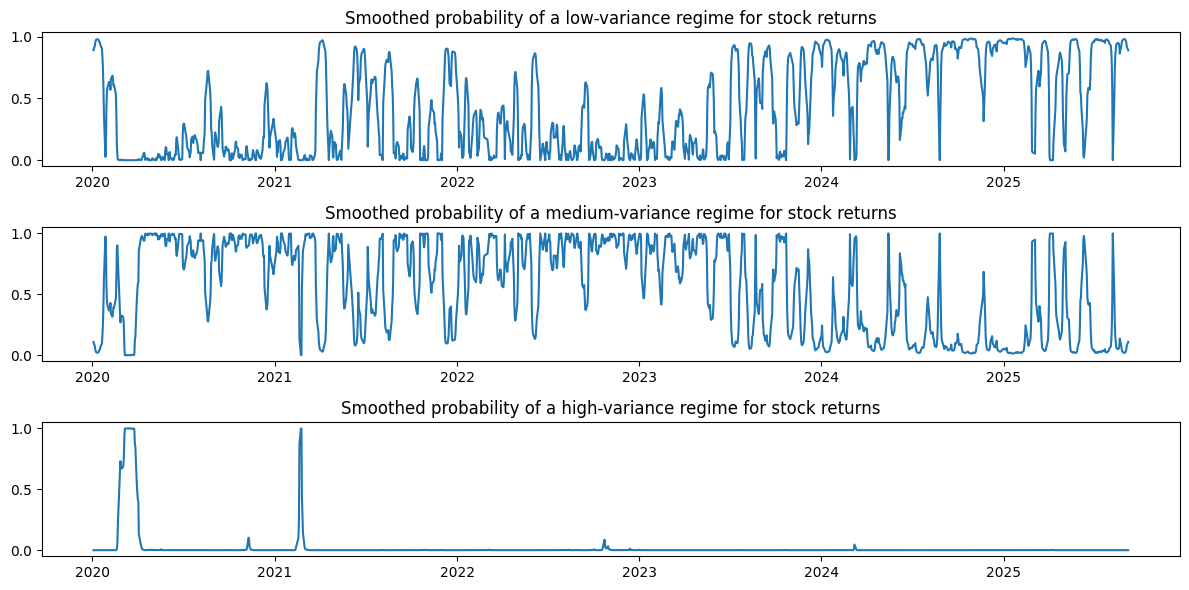

In [151]:
fig, axes = plt.subplots(3)
ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.set(title="Smoothed probability of a low-variance regime for stock returns")
ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])
ax.set(title="Smoothed probability of a medium-variance regime for stock returns")
ax = axes[2]
ax.plot(res_kns.smoothed_marginal_probabilities[2])
ax.set(title="Smoothed probability of a high-variance regime for stock returns")
fig.tight_layout()


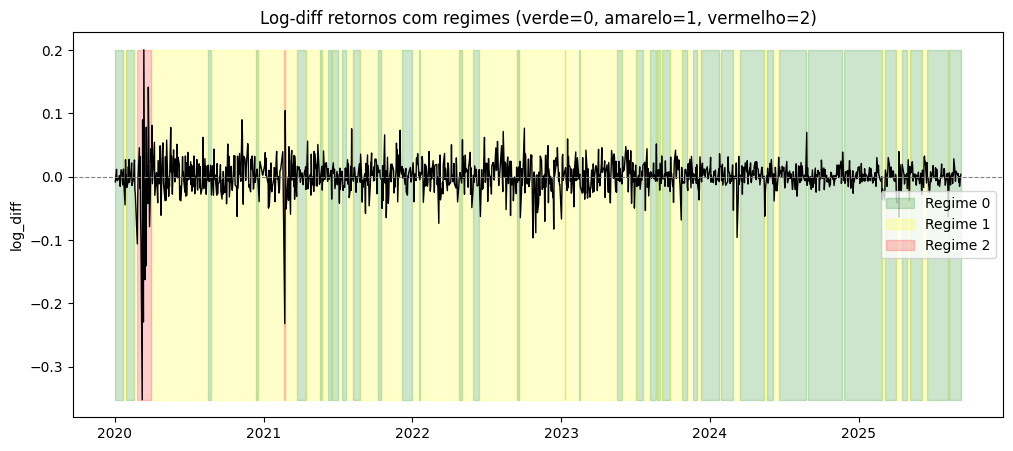

In [153]:
# Garantir alinhamento dos índices
log_diff = log_diff.dropna()
regimes = res_kns.smoothed_marginal_probabilities.idxmax(axis=1).reindex(log_diff.index)
# Definir cores de fundo para cada regime
colors = {0: "green", 1: "yellow", 2: "red"}
fig, ax = plt.subplots(figsize=(12, 5))
# Plot da série de retornos
ax.plot(log_diff.index, log_diff.values, color="black", linewidth=1)
ax.axhline(0, color="gray", linestyle="--", linewidth=0.8)
# Percorre os regimes e pinta as regiões
for regime, color in colors.items():
    mask = regimes == regime
    ax.fill_between(
        log_diff.index,
        log_diff.min(), log_diff.max(),
        where=mask,
        color=color,
        alpha=0.2,
        label=f"Regime {regime}"
    )
ax.set_title("Log-diff retornos com regimes (verde=0, amarelo=1, vermelho=2)")
ax.set_ylabel("log_diff")
ax.legend()
plt.show()

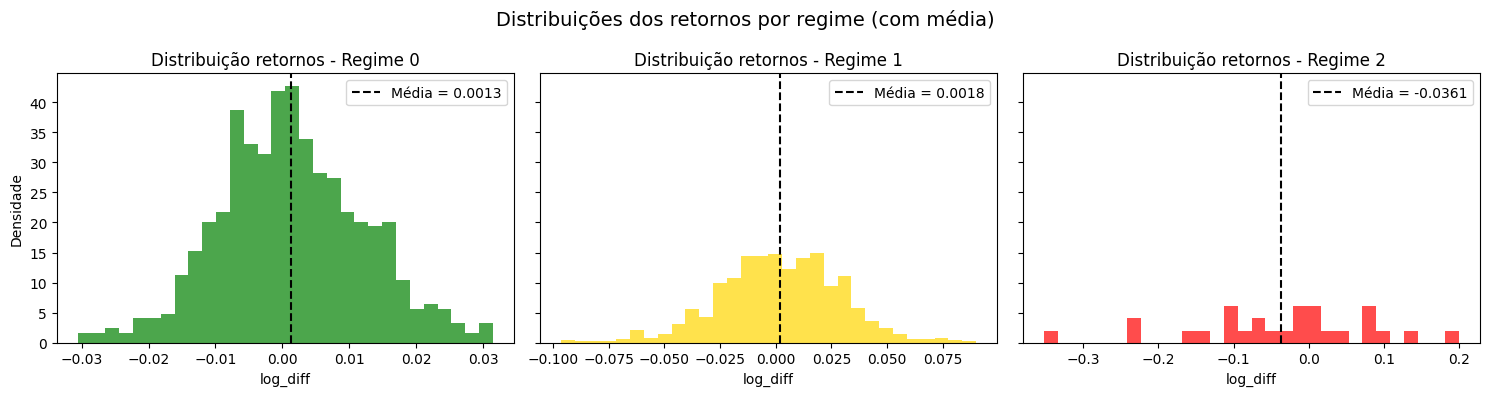

In [156]:
# Se log_diff for DataFrame com 1 coluna, transforma em Series
if isinstance(log_diff, pd.DataFrame):
    log_diff = log_diff.iloc[:, 0]

log_diff = log_diff.dropna()
regimes = res_kns.smoothed_marginal_probabilities.idxmax(axis=1).reindex(log_diff.index)

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

colors = {0: "green", 1: "gold", 2: "red"}

for regime in [0, 1, 2]:
    ax = axes[regime]
    dados_regime = log_diff[regimes == regime]

    # Histograma
    ax.hist(dados_regime, bins=30, color=colors[regime], alpha=0.7, density=True)

    # Média como escalar
    media = float(dados_regime.mean())
    ax.axvline(media, color="black", linestyle="--", linewidth=1.5,
               label=f"Média = {media:.4f}")

    ax.set_title(f"Distribuição retornos - Regime {regime}")
    ax.set_xlabel("log_diff")
    if regime == 0:
        ax.set_ylabel("Densidade")
    ax.legend()

fig.suptitle("Distribuições dos retornos por regime (com média)", fontsize=14)
fig.tight_layout()
plt.show()


# Filardo (1994) Time-Varying Transition Probabilities

In [184]:
mod_filardo = sm.tsa.MarkovAutoregression(
    dados.iloc[2:],
    k_regimes=2,
    order=4,
    switching_ar=True,
    switching_variance=True,
    exog_tvtp=sm.add_constant(dados.iloc[1:-1]),
)
res_filardo = mod_filardo.fit()

C:\ProgramData\Anaconda3\envs\bbvi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [185]:
res_filardo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                VALUE (-)   No. Observations:                  263
Model:             MarkovAutoregression   Log Likelihood                 881.816
Date:                  Tue, 09 Sep 2025   AIC                          -1731.633
Time:                          09:51:06   BIC                          -1674.478
Sample:                      04-01-2003   HQIC                         -1708.664
                           - 06-01-2025                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0025      0.001      4.638      0.000       0.001       0.004
sigma2       4.53e-05    5.8e-06      7.808      0.000    3.39e-05    5.67e-05
ar.L1         -0.0325      0.073     -0.445      0.657      -0.176       0.111
ar.L2          0.0007      0.066      0.010      0.992      -0.129       0.130
ar.L3         -0.0201      0.064     -0.312      0.755      -0.146       0.106
ar.L4          0.0820      0.057      1.427      0.153      -0.031       0.195
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0018      0.005     -0.370      0.711      -0.011       0.008
sigma2         0.0006      0.000      2.265      0.024    8.59e-05       0.001
ar.L1          0.8617      0.303      2.845      0.004       0.268       1.455
ar.L2          0.0810      0.256      0.317      0.752      -0.420       0.582
ar.L3          0.0212      0.169      0.126      0.900      -0.310       0.352
ar.L4          0.0360      0.082      0.437      0.662      -0.125       0.197
                           Regime transition parameters                          
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
p[0->0].tvtp0     3.3663      0.839      4.012      0.000       1.722       5.011
p[1->0].tvtp0    -0.7011      0.728     -0.963      0.336      -2.129       0.726
p[0->0].tvtp1   -26.7477     77.116     -0.347      0.729    -177.893     124.397
p[1->0].tvtp1   -15.0228     19.701     -0.763      0.446     -53.637      23.591
=================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

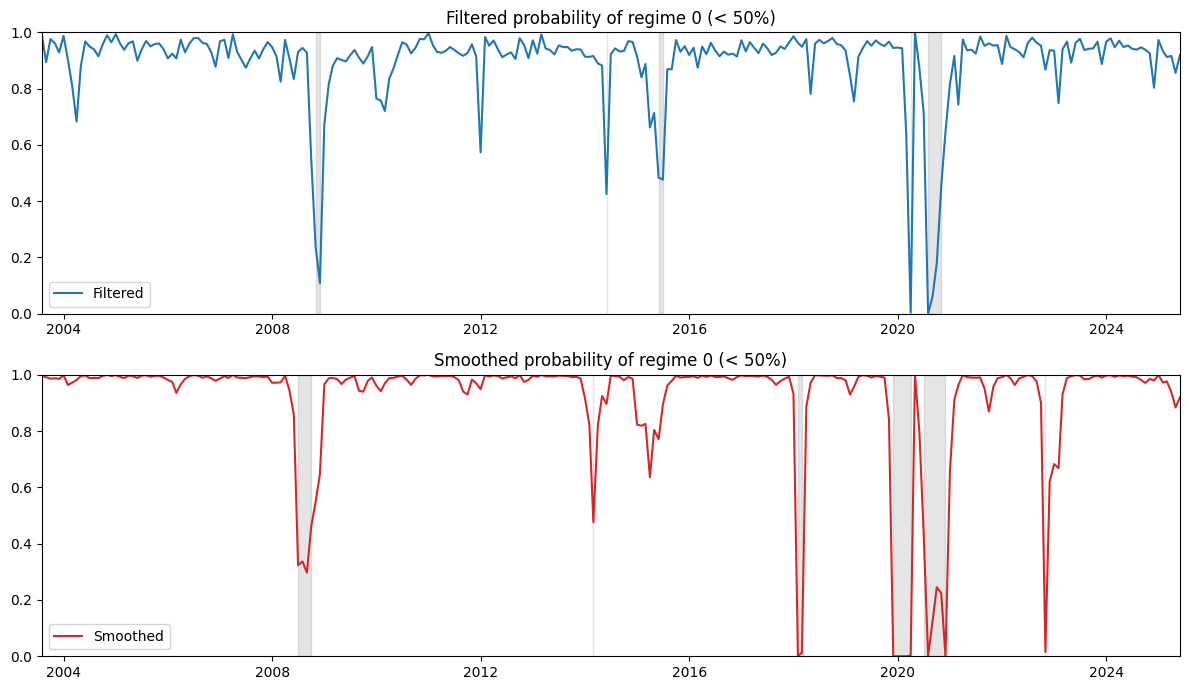

In [186]:
# Pegue as séries já indexadas corretamente
p_filt   = res_filardo.filtered_marginal_probabilities[0]
p_smooth = res_filardo.smoothed_marginal_probabilities[0]

idx_f = p_filt.index
idx_s = p_smooth.index

fig, axes = plt.subplots(2, figsize=(12, 7), sharex=False)

# ------------------- 1) Probabilidade filtrada -------------------
ax = axes[0]
ax.plot(idx_f, p_filt, label="Filtered")
ax.fill_between(idx_f, 0, 1, where=(p_filt < 0.5).values, color="k", alpha=0.1)
ax.set_xlim(idx_f[0], idx_f[-1])
ax.set_ylim(0, 1)
ax.set_title("Filtered probability of regime 0 (< 50%)")
ax.legend()

# ------------------- 2) Probabilidade suavizada -------------------
ax = axes[1]
ax.plot(idx_s, p_smooth, label="Smoothed", color="tab:red")
ax.fill_between(idx_s, 0, 1, where=(p_smooth < 0.5).values, color="k", alpha=0.1)
ax.set_xlim(idx_s[0], idx_s[-1])
ax.set_ylim(0, 1)
ax.set_title("Smoothed probability of regime 0 (< 50%)")
ax.legend()

fig.tight_layout()
plt.show()


<Axes: title={'center': 'Expected duration of reg 0'}, xlabel='DATE'>

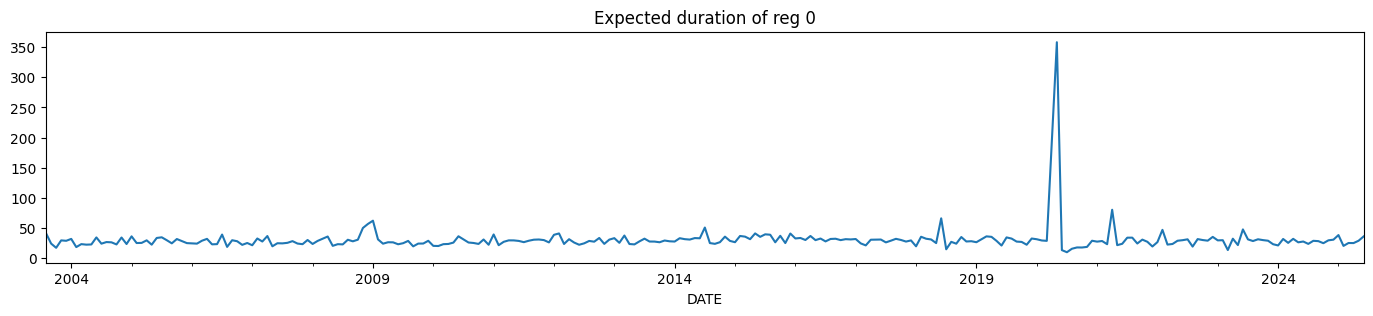

In [201]:
res_filardo.expected_durations[0].plot(
    title="Expected duration of reg 0", figsize=(17, 3)
)


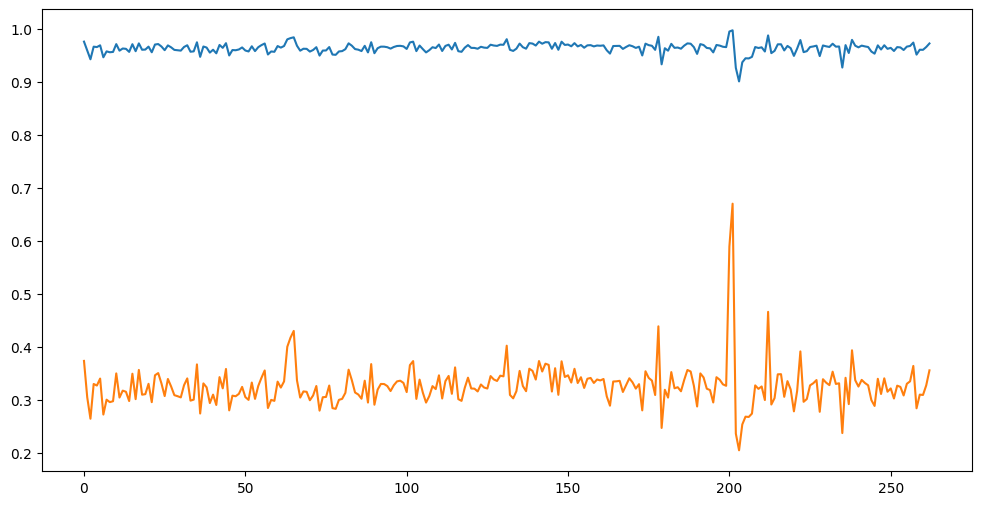

In [200]:
plt.plot(res_filardo.regime_transition[0].T)
plt.show()